In [19]:
import sys

import polars as pl
import matplotlib.pyplot as plt

work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager_new import RunManager, RunsManager, RunViewer



In [26]:
rv = RunViewer(exp_path="./")
rv.write_stats()

# 表示するrun_idを指定
df_stats = rv.fetch_stats()
df_stats_ext = df_stats
# df_stats_ext = df_stats.filter((pl.col("num_data") == 2500) & (pl.col("fils") != 48))
# df_stats_ext = df_stats.filter((pl.col("fils") == 1) & (pl.col("num_data") == 10000))
print(len(df_stats_ext["run_id"].to_list()))
print(df_stats_ext["run_id"].to_list())

# run_idから，metricsを取得
run_ids = df_stats_ext["run_id"]
df_mets = rv.fetch_metrics()
df_agg = df_mets.group_by(by="run_id", maintain_order=True).agg(pl.all())
df_agg = df_agg.filter((pl.col("run_id").is_in(run_ids)))


80
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


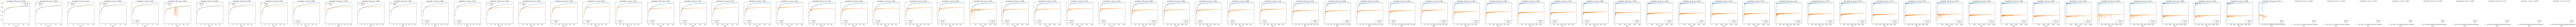

In [27]:
x_col = "epoch"
# y_cols = ["train_loss", "val_loss"]
y_cols = ["train_acc", "val_acc"]
titles = ["ensembles", "val_acc"]


fig, ax = plt.subplots(nrows=1, ncols=len(df_agg), squeeze=False, sharey=True)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(df_agg))
fig.set_figheight(4 * 1)

for i, df_row in enumerate(df_agg.iter_rows(named=True)):
    ax[0][i].set_xlabel(x_col)
    title_str = ""
    for ti, title in enumerate(titles):
        if ti != 0:
            title_str += " "
        title_str += f'{title}: {df_stats.filter(pl.col("run_id") == df_row["run_id"])[title][0]}'
    ax[0][i].set_title(title_str)
    for y_col in y_cols:
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = y_col

        ax[0][i].plot(x, y, label=label)
    ax[0][i].legend()






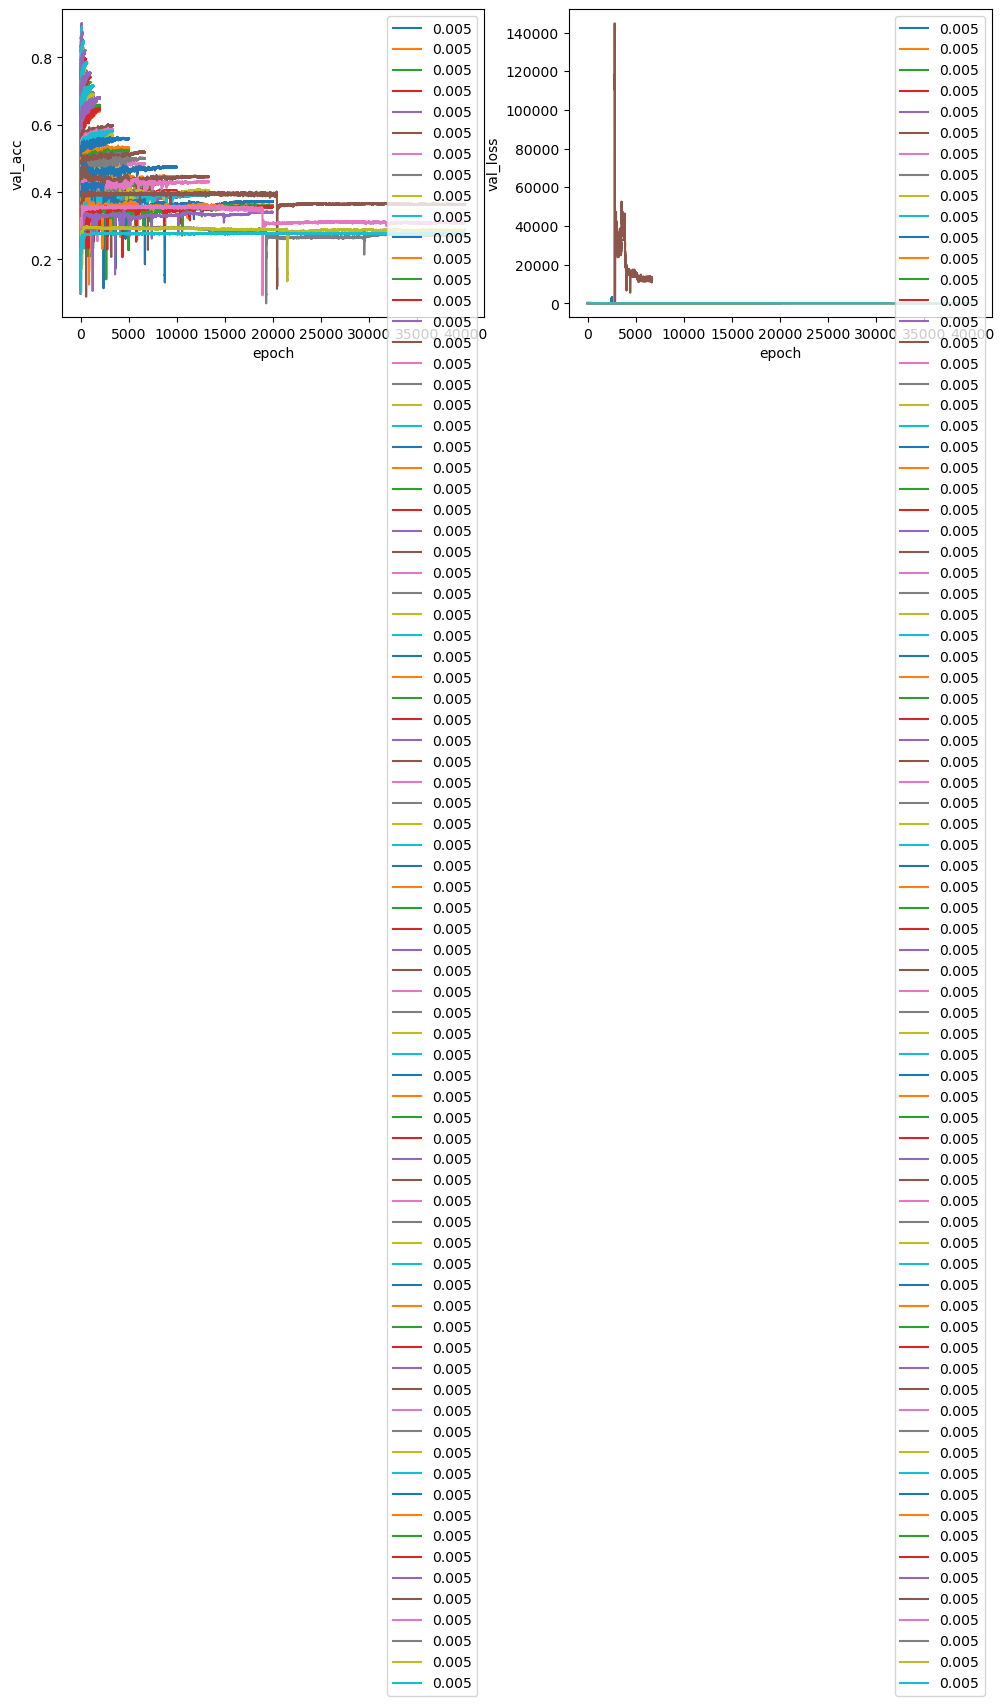

In [28]:
x_col = "epoch"
y_cols = ["val_acc", "val_loss"]
label_col = "max_lr"

fig, ax = plt.subplots(nrows=1, ncols=len(y_cols), squeeze=False, sharey=False)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(y_cols))
fig.set_figheight(4 * 1)

for i, y_col in enumerate(y_cols):
    ax[0][i].set_xlabel(x_col)
    ax[0][i].set_ylabel(y_col)
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[label_col][0]

        ax[0][i].plot(x, y, label=label)

    ax[0][i].legend()



